In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

In [7]:
t = X_train[0].flatten().shape
t[0]

784

In [8]:
X_train = X_train/255
X_test = X_test/255
X_train_flat = X_train.reshape(len(X_train), t[0])
X_test_flat = X_test.reshape(len(X_test), t[0])

In [9]:
X_test_flat.shape
X_train.mean()

0.1306604762738429

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4680 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 2s 982us/step - loss: 0.3041 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2671 - accuracy: 0.9264


In [11]:
model.evaluate(X_test_flat, Y_test)

313/313 [==============================] - 0s 936us/step - loss: 0.2708 - accuracy: 0.9223


[0.2707583010196686, 0.9222999811172485]

In [12]:
y_pred = model.predict(X_test_flat)

313/313 [==============================] - 0s 811us/step


In [13]:
y_pred[0]

array([2.3615781e-02, 3.8337677e-07, 4.5283232e-02, 9.5994937e-01,
       4.1095545e-03, 1.3651639e-01, 1.2947855e-06, 9.9987143e-01,
       1.2513672e-01, 6.6361231e-01], dtype=float32)

In [14]:
y_pred[0].argmax()

7

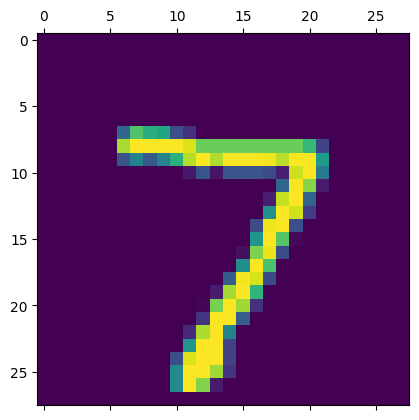

In [15]:
plt.matshow(X_test[0])

In [16]:
y_pred_labels = [i.argmax() for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
cm = tf.math.confusion_matrix(labels=y_pred_labels, predictions=Y_test)

In [18]:
import seaborn as sns

Text(33.22222222222222, 0.5, 'Truth')

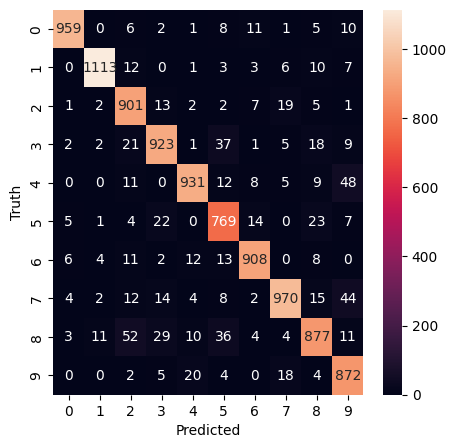

In [19]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
shape = X_train[0].shape
shape[0]

28

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(shape[0], shape[1])),
    keras.layers.Dense(200, activation='tanh'),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=5)  

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.9196
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1156 - accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0750 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0521 - accuracy: 0.9842
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0391 - accuracy: 0.9879


In [66]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0747 - accuracy: 0.9780


[0.07473839819431305, 0.9779999852180481]

In [67]:
y_pred_label = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [68]:
y_pred_label = [i.argmax() for i in y_pred_label]

In [69]:
cm_hl = tf.math.confusion_matrix(labels=y_pred_label, predictions=Y_test)
cm_hl

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    6,    1,    2,    6,   10,    2,    5,    2],
       [   0, 1126,    3,    0,    1,    1,    3,    8,    0,    3],
       [   1,    4, 1003,    4,    1,    0,    1,    9,    0,    0],
       [   1,    0,    4,  993,    0,   13,    1,    3,    7,    5],
       [   0,    0,    1,    0,  966,    2,    3,    1,    4,   15],
       [   0,    0,    0,    2,    0,  861,    2,    0,    3,    2],
       [   1,    1,    2,    0,    4,    3,  934,    0,    1,    0],
       [   1,    0,    5,    2,    2,    1,    0,  997,    1,    5],
       [   2,    4,    7,    3,    1,    4,    4,    3,  951,    1],
       [   1,    0,    1,    5,    5,    1,    0,    5,    2,  976]])>

Text(95.72222222222221, 0.5, 'True Values')

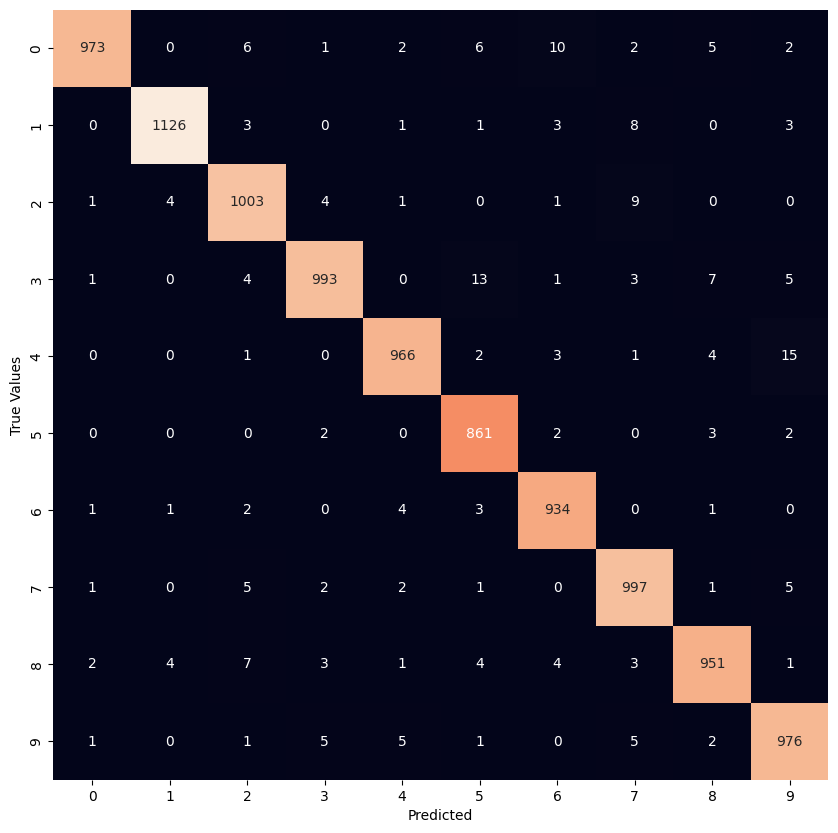

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_hl, annot=True, cbar=False, fmt='d', annot_kws={"size" : 10})
plt.xlabel("Predicted")
plt.ylabel("True Values")

In [72]:
import joblib

In [73]:
joblib.dump(model, 'Deep_model.sav')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-01 15:12:26         1999
metadata.json                                  2022-12-01 15:12:26           64
variables.h5                                   2022-12-01 15:12:26      2161088


['Deep_model.sav']

In [75]:
Classifier_NN = joblib.load(filename='Deep_model.sav')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-12-01 15:12:26         1999
metadata.json                                  2022-12-01 15:12:26           64
variables.h5                                   2022-12-01 15:12:26      2161088
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
